In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

In [5]:
# Import the dataset
df=pd.read_csv("cleaned_data.csv")
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [4]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_feats=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

In [6]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


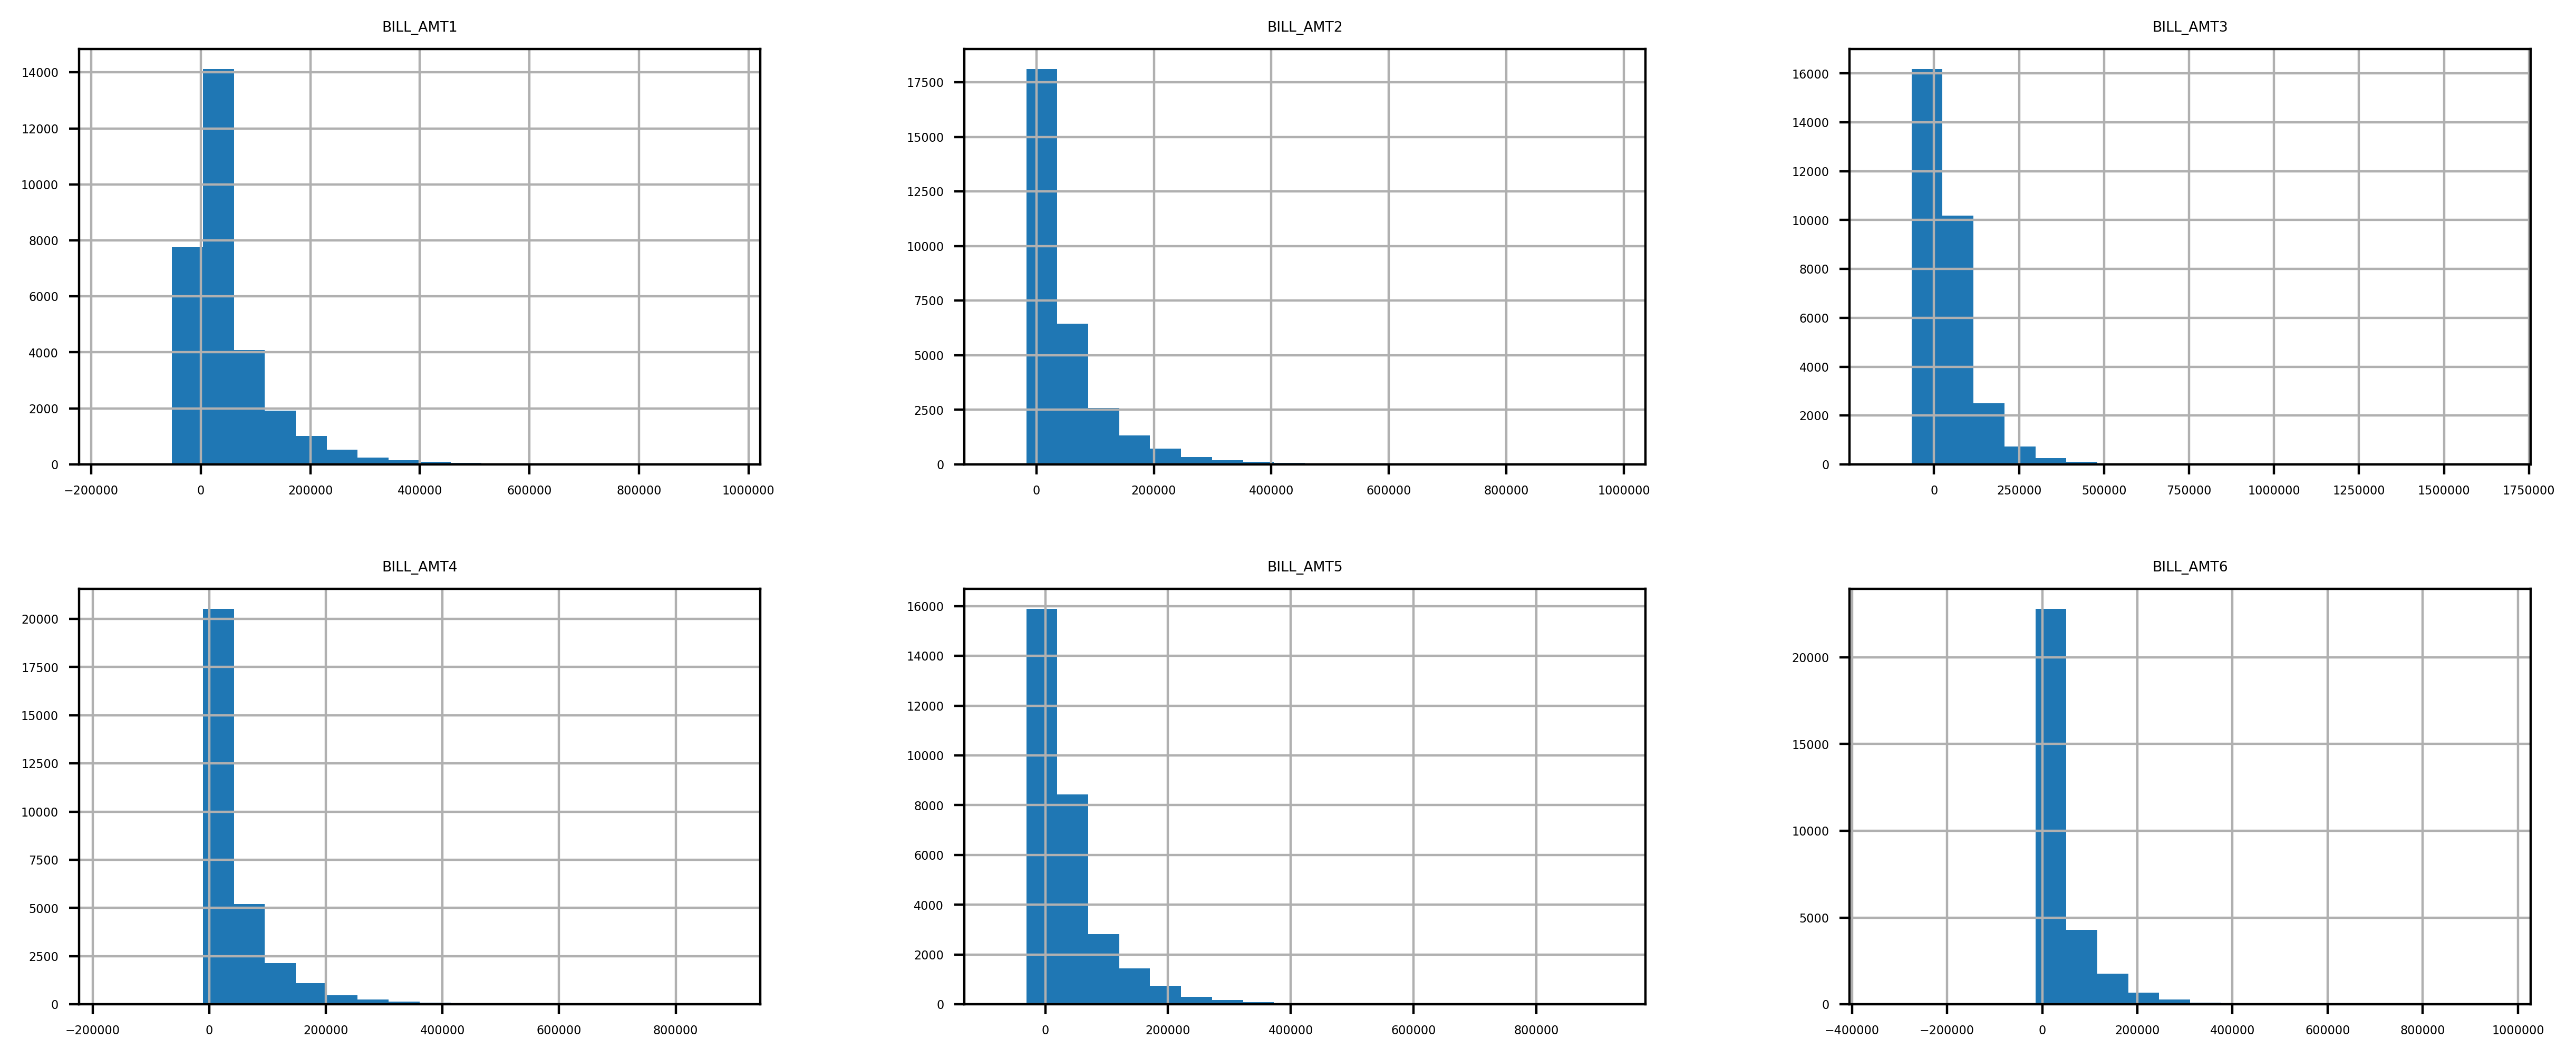

In [7]:
df[bill_feats].hist(bins=20,layout=(2,3),figsize=(15,6))
plt.show()

In [8]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


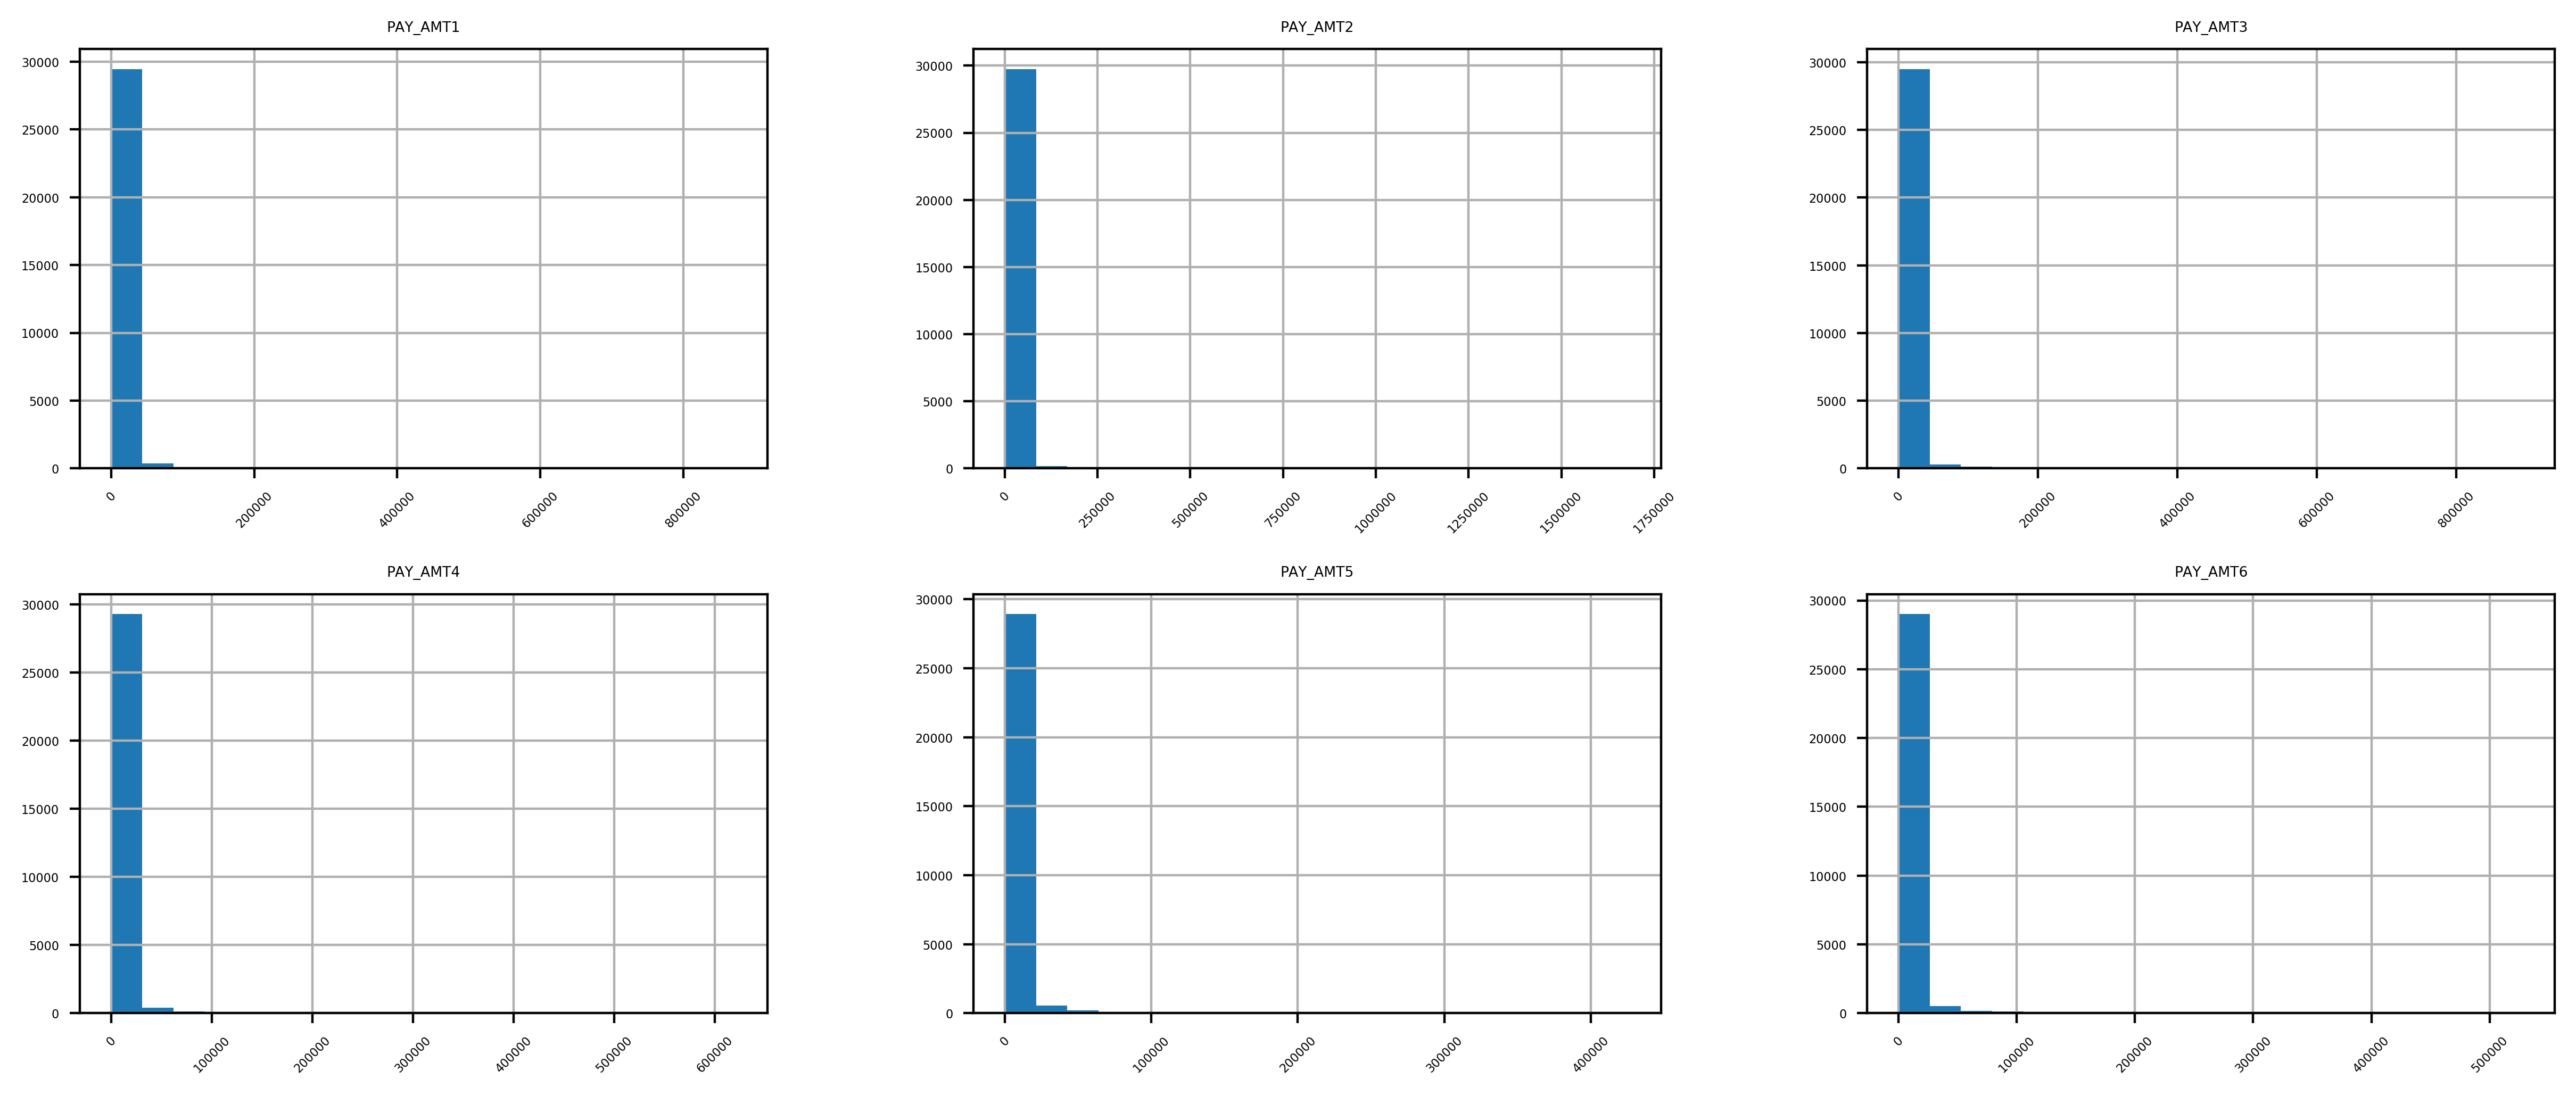

In [9]:
df[pay_amt_feats].hist(bins=20,layout=(2,3),xrot=45,figsize=(15,6))
plt.show()

In [10]:
bool_mask=df[pay_amt_feats]==0
pay_df=df[pay_amt_feats]
pay_df[~bool_mask]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,NaN,689.0,NaN,NaN,NaN,NaN
1,NaN,1000.0,1000.0,1000.0,NaN,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...
29995,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1837.0,3526.0,8998.0,129.0,NaN,NaN
29997,NaN,NaN,22000.0,4200.0,2000.0,3100.0
29998,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [11]:
pay_df.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [12]:
pay_df.sum()

PAY_AMT1    169907415.0
PAY_AMT2    177634905.0
PAY_AMT3    156770445.0
PAY_AMT4    144782306.0
PAY_AMT5    143981629.0
PAY_AMT6    156465077.0
dtype: float64

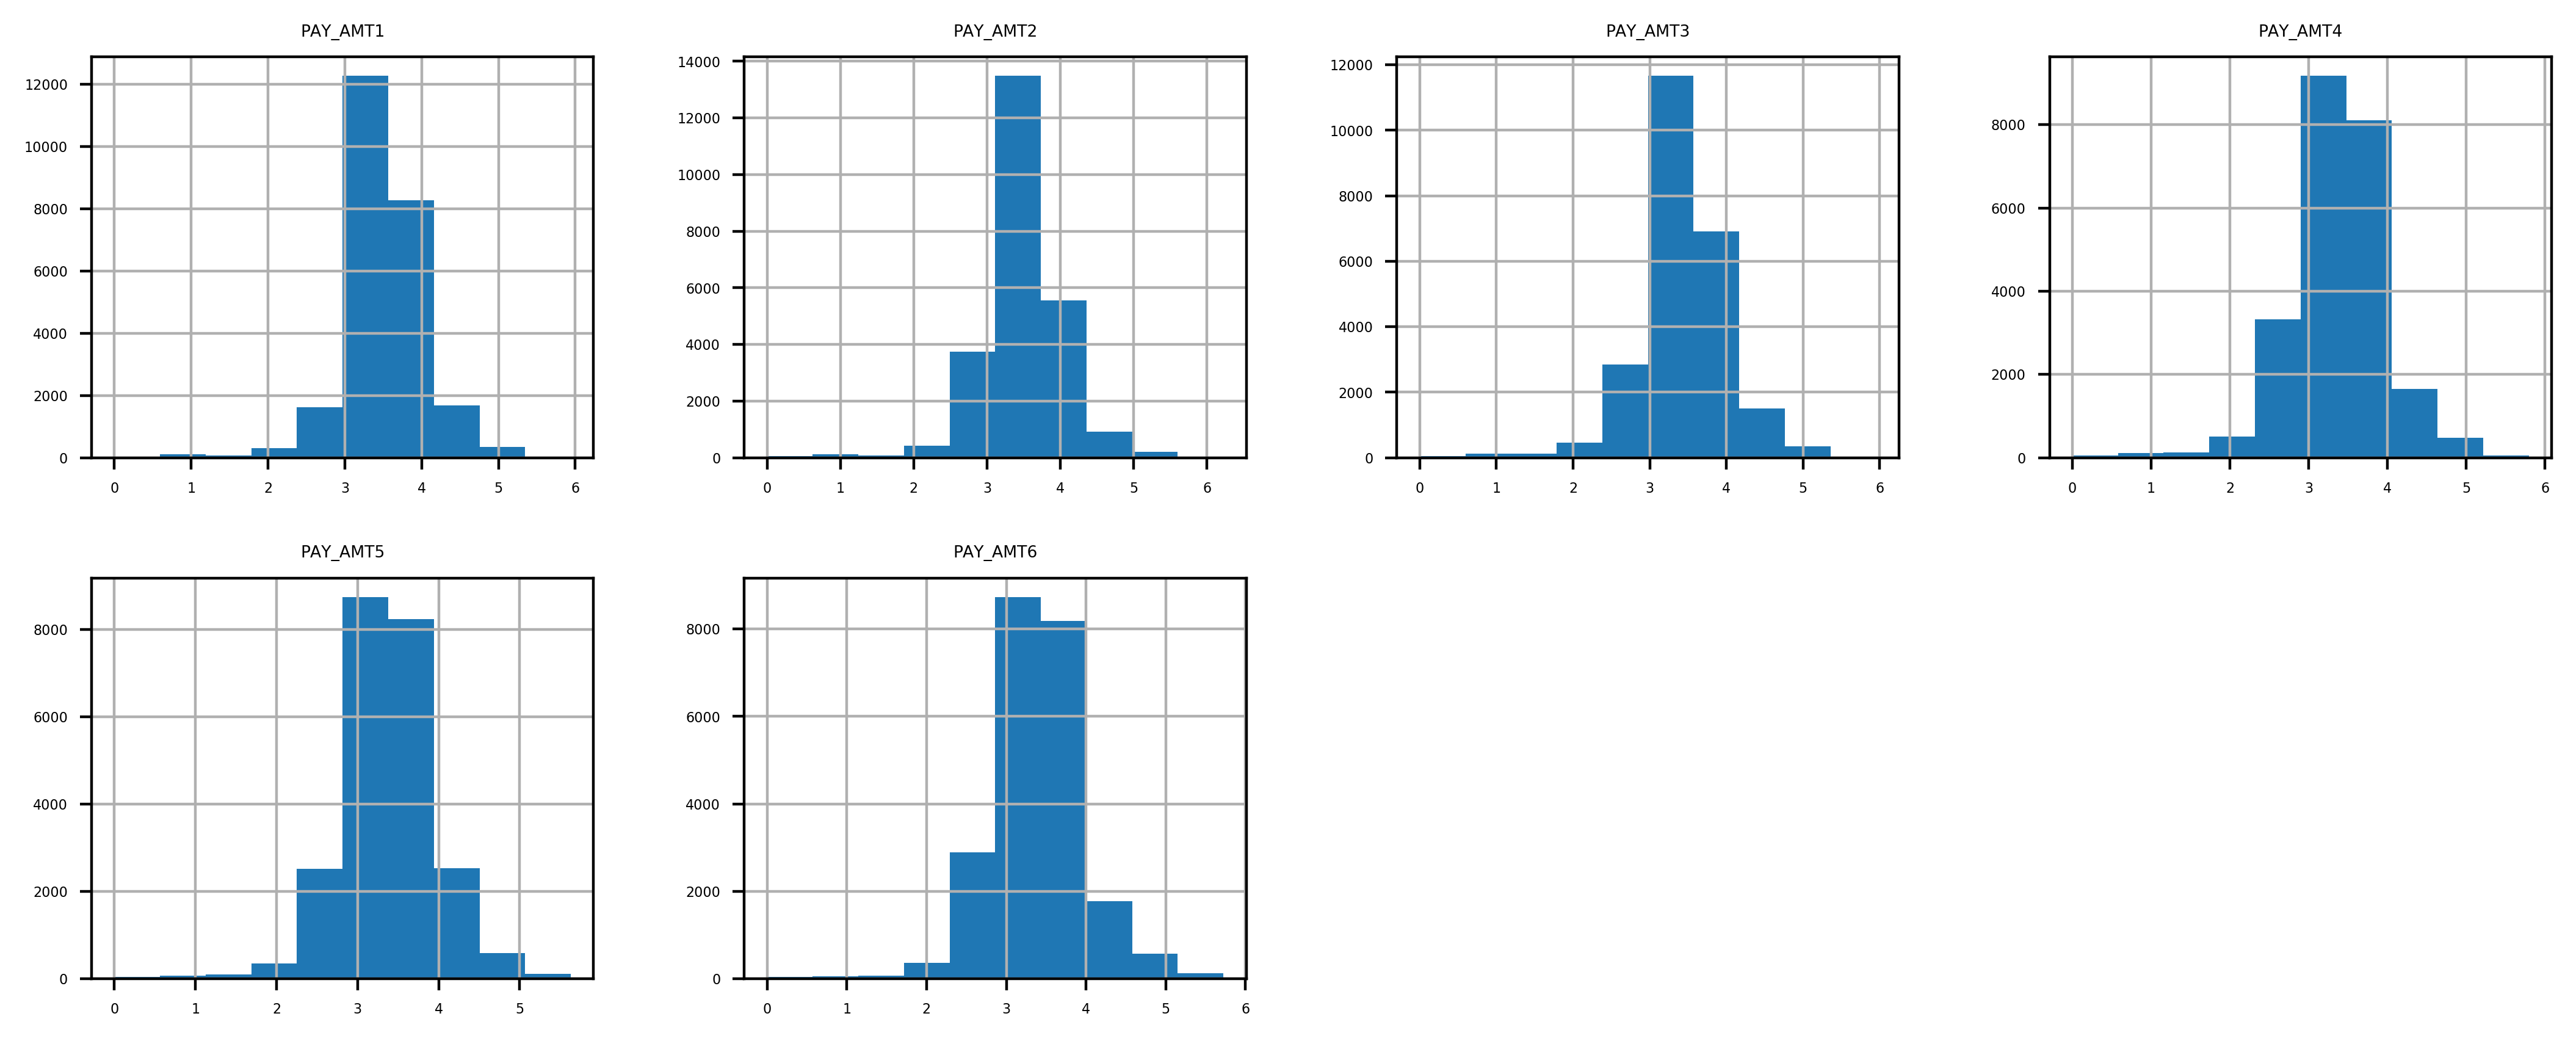

In [13]:
import numpy as np
df=pay_df[~bool_mask].apply(np.log10)
df.hist(layout=(2,4),figsize=(13,5))
plt.show()